# Data Sci Eng Methods

## Neural Network Type Classification | TMNIST

### Data Set

This dataset consists of images representing digits from 0-9 produced using 2,990 google fonts files.

This file consists of 29,900 examples with labels and font names. Each row contains 786 elements: the first element represents the font name (ex-Chivo-Italic, Sen-Bold), the second element represents the label (a number from 0-9) and the remaining 784 elements represent the grayscale pixel values (from 0-255) for the 28x28 pixel image.


### Aim:
To Create a Neural Network for Classifying the the digits

In [51]:
# Import lib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# Load Data

Using Pandas and DataLoader to load the data

In [3]:
# Raw Data link
datalink = "https://raw.githubusercontent.com/ChaudharyAnshul/NeuralNetwork_TMNIST/main/Dataset/TMNIST_Data.csv"

In [4]:
# Read Data
df = pd.read_csv(datalink)

# Data Processing

In [5]:
# Check if there are null values
null_values = df.isnull().sum()
print(null_values[null_values != 0]) # print all the null values

Series([], dtype: int64)


In [6]:
df.head(5)

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.describe()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,...,29900.000000,29900.000000,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0,29900.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003445,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.872329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.493058,0.005783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.columns

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [9]:
# Split input and target variables
X = df.drop(columns=['names','labels']).values
y = df[['labels']].values

Print shape of X and y to get idea of the data

In [10]:
X.shape

(29900, 784)

In [11]:
y.shape

(29900, 1)

In [12]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Reshape y
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [14]:
# Scaling data bringing the values between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [15]:
# Reshape images to 28x28
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [16]:
# Use OneHotEncoder to encode target column
y_train_e = to_categorical(y_train, num_classes=10)
y_test_e = to_categorical(y_test, num_classes=10)

# Data Visualization

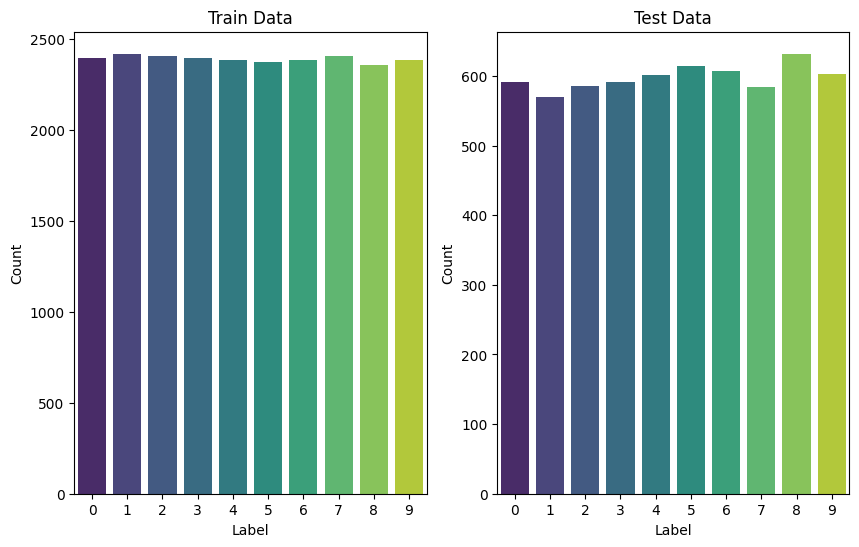

In [17]:
# Bar chart with labels and color gradient
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

ax = sns.barplot(x=unique_train, y=counts_train, palette="viridis", ax = ax1)
ax = sns.barplot(x=unique_test, y=counts_test, palette="viridis", ax = ax2)

# labeling the pliot
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.set_title('Train Data')

ax2.set_xlabel('Label')
ax2.set_ylabel('Count')
ax2.set_title('Test Data')

# Show the plot
plt.show()

Inference:

* We can observe that the there are 3000 data points for each label in the entire data and their distribution in Test, Train.
* They seem to be distributes evenly without any Bias in the data

In [18]:
first_9_digits = X_train[0:9]

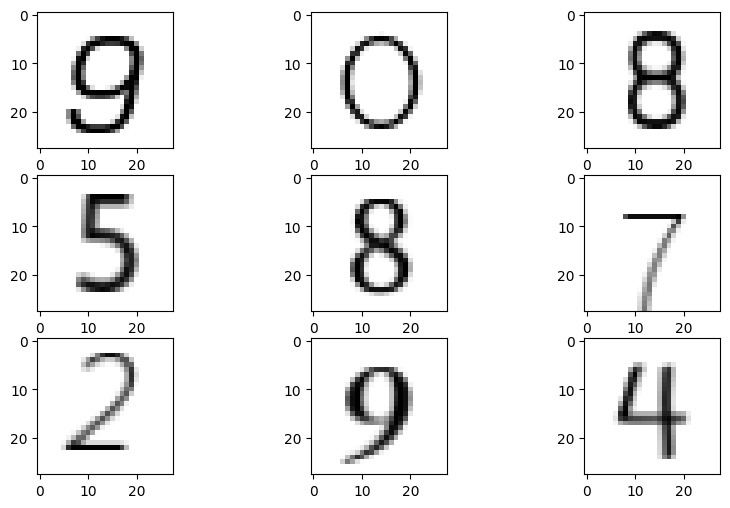

In [19]:
# Plotting a images
fig, ax = plt.subplots(3,3,figsize=(10,6))

ax[0,0].imshow(first_9_digits[0], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[0,1].imshow(first_9_digits[1], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[0,2].imshow(first_9_digits[2], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,0].imshow(first_9_digits[3], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,1].imshow(first_9_digits[4], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,2].imshow(first_9_digits[5], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,0].imshow(first_9_digits[6], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,1].imshow(first_9_digits[7], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,2].imshow(first_9_digits[8], cmap = matplotlib.cm.binary, interpolation = 'nearest')

### Plot of first 9 (28x28) digits in the training data

 # CNN

 Defines a Convolutional Neural Network (CNN) for classification

In [43]:
# CNN Model with layers
cnnModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer with 32 output

    Conv2D(32, (3, 3), activation='relu'), # Convolutional layer with 32 output channels

    MaxPooling2D((2,2)), # Max pooling layer to reduce the spatial dimensions

    Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 output channels

    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer with 64 output channels

    MaxPooling2D((2,2)),  # Max pooling layer to reduce the spatial dimensions

    Flatten(), # Flatten the output for input to fully connected layers

    Dropout(0.5),  # Dropout layer to prevent overfitting

    Dense(512, activation='relu'),  # Another fully connected layer with 512 output units

    Dropout(0.5), # Dropout layer to prevent overfitting

    Dense(10, activation='softmax')  # Final fully connected layer with 10 output units (corresponding to classes)

])

### Model Working

1. **Convolutional Layers**:
   - `Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))`: First convolutional layer with 32 filters, each using a 3x3 kernel, ReLU activation function, and an input shape of (28, 28, 1) representing grayscale images.
   - `Conv2D(32, (3, 3), activation='relu')`: Second convolutional layer with 32 filters and ReLU activation.
   - `Conv2D(64, (3, 3), activation='relu')`: Third convolutional layer with 64 filters and ReLU activation.
   - `Conv2D(64, (3, 3), activation='relu')`: Fourth convolutional layer with 64 filters and ReLU activation.

2. **Pooling Layers**:
   - `MaxPooling2D((2, 2))`: Max pooling layers to reduce spatial dimensions by half after certain convolutional layers.

3. **Flatten Layer**:
   - `Flatten()`: Layer to flatten the output of the convolutional layers into a 1D array for input to the fully connected layers.

4. **Dropout Layers**:
   - `Dropout(0.5)`: Dropout layers with a dropout rate of 0.5, intended to prevent overfitting by randomly dropping 50% of input units during training.

5. **Dense (Fully Connected) Layers**:
   - `Dense(512, activation='relu')`: Fully connected layer with 512 neurons and ReLU activation.
   - `Dense(10, activation='softmax')`: Final fully connected layer with 10 neurons, representing classes in the dataset, and using softmax activation for multi-class classification.

In [44]:
# specifying optimizer, loss function, and metrics
cnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

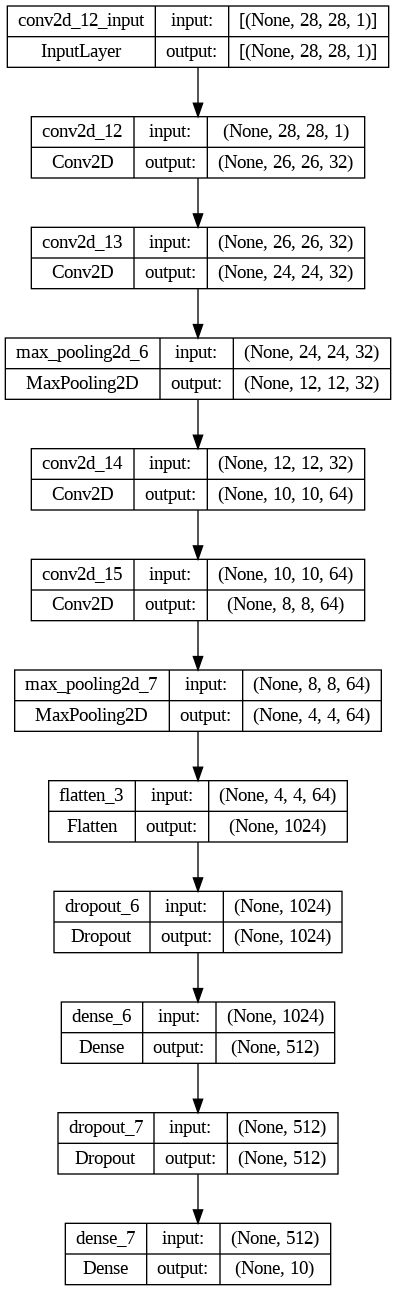

In [56]:
plot_model(cnnModel, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

1. **First Convolutional Layer (`conv2d_12`):**
   - This layer uses a Conv2D operation with 32 output filters, a kernel size of (3, 3), and presumably a 'same' padding (since the output size reduces from 28x28 to 26x26). It has 320 parameters, which are the weights and biases for the filters applied to the input image.

2. **Second Convolutional Layer (`conv2d_13`):**
   - Another Conv2D layer follows up with 32 filters of size (3, 3). It processes the result of the previous layer, further reducing the output shape to 24x24 and involving 9,248 parameters, which indicates more feature extraction from the input provided by the first layer.

3. **First Max Pooling Layer (`max_pooling2d_6`):**
   - This layer applies max pooling with a pool size of (2, 2), reducing the spatial dimensions by half (to 12x12). Max pooling helps to make the representation smaller and more manageable and introduces translational invariance by boiling down the outputs of the convolutional layers to their most essential elements.

4. **Third Convolutional Layer (`conv2d_14`):**
   - With a bump-up in filter count to 64 and a (3, 3) kernel, this Conv2D layer processes the pooled data, resulting in a 10x10 feature map and having 18,496 parameters.

5. **Fourth Convolutional Layer (`conv2d_15`):**
   - Another Conv2D layer with 64 filters maintains the progression of feature extraction, leaving an 8x8 output and involving 36,928 parameters.

6. **Second Max Pooling Layer (`max_pooling2d_7`):**
   - The max pooling operation is applied once again, further reducing the spatial dimension to 4x4.

7. **Flatten Layer (`flatten_3`):**
   - Post the convolutions and subsampling, the Flatten layer is used to convert the 2D feature maps into a 1D vector (flat array) of 1024 elements, enabling the data to be fed into the dense layers that follow.

8. **Dropout Layer (`dropout_6`):**
   - To help prevent overfitting, a Dropout layer is included which randomly sets input units (neurons) to 0 at a rate of 0.5 during training.

9. **First Dense Layer (`dense_6`):**
   - This fully connected layer has 512 units with ReLU activation and is responsible for the high-level reasoning in the neural network, involving 524,800 parameters, suggesting a complex layer with many learned weights.

10. **Dropout Layer (`dropout_7`):**
    - The second Dropout layer continues to aid in preventing overfitting, applying the same disabling of neurons during training.

11. **Output Layer (`dense_7`):**
    - The final layer is a dense layer with 10 units and a softmax activation function, which is standard for multi-class classification problems, such as distinguishing between 10 different classes. It has 5,130 parameters.

In [46]:
modelHistory = cnnModel.fit(X_train, y_train_e, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
1196/1196 [==============================] - 66s 54ms/step - loss: 0.2108 - accuracy: 0.9328 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 2/10
1196/1196 [==============================] - 68s 57ms/step - loss: 0.0635 - accuracy: 0.9813 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 3/10
1196/1196 [==============================] - 76s 63ms/step - loss: 0.0479 - accuracy: 0.9854 - val_loss: 0.0404 - val_accuracy: 0.9902
Epoch 4/10
1196/1196 [==============================] - 68s 57ms/step - loss: 0.0400 - accuracy: 0.9867 - val_loss: 0.0269 - val_accuracy: 0.9916
Epoch 5/10
1196/1196 [==============================] - 70s 58ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0253 - val_accuracy: 0.9923
Epoch 6/10
1196/1196 [==============================] - 64s 54ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 7/10
1196/1196 [==============================] - 67s 56ms/step - loss: 0.0298 - accuracy: 0.9903 - val_loss: 0.0271 -

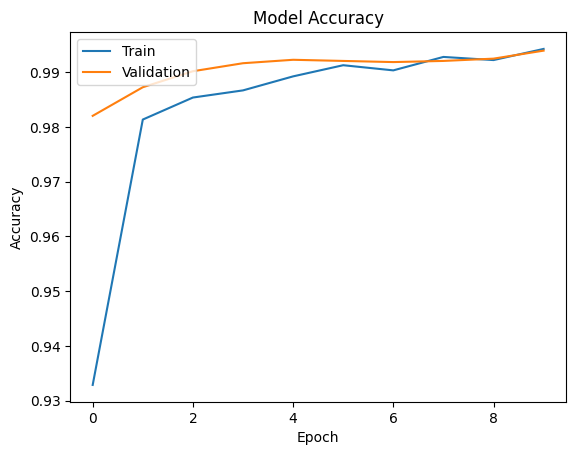

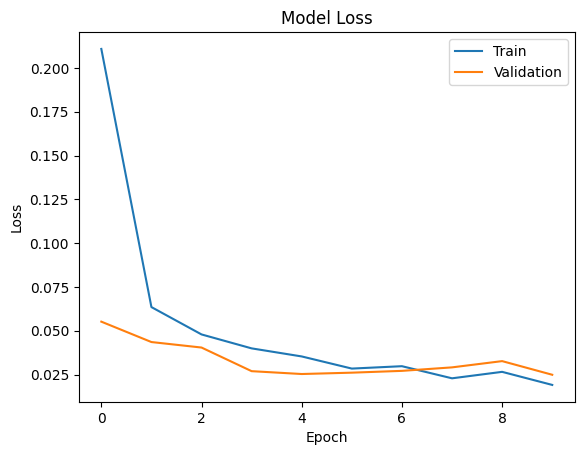

In [49]:
# Plot training accuracy and loss
plt.plot(modelHistory.history['accuracy'])
plt.plot(modelHistory.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(modelHistory.history['loss'])
plt.plot(modelHistory.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Observations:

1. **Epochs and Performance**: With an increase in the number of epochs, the model's accuracy increases, and the loss decreases. This demonstrates the model's learning and improvement with more exposure to the training data.

2. **Overfitting Identification**: Starting from the 6th epoch, a noticeable disparity emerges between the training and validation metrics:
    - **Training Accuracy vs. Validation Accuracy**: Training accuracy surpasses validation accuracy.
    - **Training Loss vs. Validation Loss**: Training loss becomes lower than validation loss.

Inference:

- The model starts to overfit the training data, leading to higher accuracy and lower loss on the training set compared to the validation set.

In [47]:
results = cnnModel.evaluate(X_test, y_test_e)

187/187 [==============================] - 5s 27ms/step - loss: 0.0345 - accuracy: 0.9936


In [48]:
print(f"Accuracy: {results[1]}")
print(f"Loss: {results[0]}")

Accuracy: 0.9936454892158508
Loss: 0.034473761916160583


## Conclusion

Trained a Convolutional Neural Network (CNN) model on the Typeface MNIST dataset for 10 epochs, the following key findings were observed:

1. **Model Performance Metrics**:
    - **Accuracy**: Achieved an impressive accuracy of 99.36% on the Typeface MNIST dataset. This metric indicates the percentage of correctly classified instances out of the total.
    - **Loss**: Attained a low loss value of 3.4%. The loss represents the model's error in predicting the target labels; lower values indicate better performance.

2. **Training Observations**:
    - **Epochs vs. Performance**: As the number of epochs increased during training, the model demonstrated a steady improvement in accuracy and a reduction in loss.
    - **Potential Overfitting**: From the observations after 10 epochs, it's essential to assess whether the model exhibits signs of overfitting, especially considering the high accuracy and relatively low loss.

3. **Implications**:
    - **High Accuracy**: The achieved accuracy of 99% suggests that the model performs exceptionally well in classifying Typeface MNIST digits.
    - **Low Loss**: The low loss value of 0.3% further signifies the model's ability to make precise predictions.

4. **Considerations**:
    - **Overfitting Awareness**: Despite the high accuracy and low loss, it's crucial to evaluate potential overfitting concerns, especially when training accuracy is significantly higher than validation accuracy or if validation accuracy plateaus while training accuracy continues to improve.

In summary, achieving a 99.36%% accuracy and a 3.4% loss on the Typeface MNIST dataset using a CNN after 10 epochs is a commendable achievement. However, it's essential to verify the model's robustness, investigate potential overfitting, and consider further refinements for broader applicability and reliability in real-world scenarios.

## References

https://www.tensorflow.org/

https://www.kaggle.com/datasets/nikbearbrown/tmnist-alphabet-94-characters/code


## MIT License

Copyright (c) 2023 Anshul Chaudhary

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.